##==>Loading Libraries

In [3]:
pip install catboost

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

##==>Mount Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
delv= pd.read_csv("/content/drive/MyDrive/World_Cup_Predictor_T12_DataMining/deliveries.csv")
matc = pd.read_csv("/content/drive/MyDrive/World_Cup_Predictor_T12_DataMining/matches.csv")
pnt = pd.read_csv("/content/drive/MyDrive/World_Cup_Predictor_T12_DataMining/points_table.csv")

**Task-2**

We know that below are the two teams who will play in Semi Finals

India vs New Zealand

South Africa vs Australia

**Task-3**
World Cup winner Predictor

##==> Understanding Data

In [7]:
delv

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
matc

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group
5,2023/24,New Zealand,Netherlands,2023/10/09,6,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,MJ Santner,PR Reiffel,RJ Tucker,Nitin Menon,AJ Pycroft,New Zealand,99.0,NaN,Group
6,2023/24,England,Bangladesh,2023/10/10,7,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,DJ Malan,Ahsan Raza,P Wilson,HDPK Dharmasena,J Srinath,England,137.0,NaN,Group
7,2023/24,Sri Lanka,Pakistan,2023/10/10,8,Rajiv Gandhi International Stadium,Hyderabad,Sri Lanka,bat,Mohammad Rizwan,AG Wharf,CB Gaffaney,RJ Tucker,AJ Pycroft,Pakistan,NaN,6.0,Group
8,2023/24,Afghanistan,India,2023/10/11,9,Arun Jaitley Stadium,Delhi,Afghanistan,bat,RG Sharma,MA Gough,PR Reiffel,Sharfuddoula,JJ Crowe,India,NaN,8.0,Group
9,2023/24,South Africa,Australia,2023/10/12,10,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Australia,field,Q de Kock,JS Wilson,RK Illingworth,CM Brown,J Srinath,South Africa,134.0,NaN,Group


In [9]:
pnt

,Ranking,Team,Matches,Won,Lost,Tie,No Results,Points,Net Run Rate,Series Form,Next Match,For,Against
0,1,South Africa,7,6,1,0,0,12,2.290,LWWWW,"vs IND, AFG",2355/340.2,1588/343.0
1,2,India,6,6,0,0,0,12,1.405,WWWWW,"vs SL, SA, NED",1430/246.2,1320/300.0
2,3,Australia,6,4,2,0,0,8,0.970,LWWWW,"vs ENG, AFG, BAN",1745/285.2,1499/291.2
3,4,New Zealand,7,4,3,0,0,8,0.484,WWLLL,"vs PAK, SL",1964/329.1,1908/348.0
4,5,Pakistan,7,3,4,0,0,6,-0.024,LLLLW,"vs NZ, ENG",1884/330.5,1869/326.5
5,6,Afghanistan,6,3,3,0,0,6,-0.718,LWLWW,"vs NED, AUS, SA",1379/294.2,1457/269.4
6,7,Sri Lanka,6,2,4,0,0,4,-0.275,LLWWL,"vs IND, BAN, NZ",1543/274.0,1648/279.0
7,8,Netherlands,6,2,4,0,0,4,-1.277,LWLLW,"vs AFG, ENG, IND",1254/293.0,1619/291.2
8,9,Bangladesh,7,1,6,0,0,2,-1.446,LLLLL,"vs SL, AUS",1465/334.4,1845/316.5
9,10,England,6,1,5,0,0,2,-1.652,WLLLL,"vs AUS, NED, PAK",1316/300.0,1582/262.0


We will work on dataset Deliery and Matches

Most of the columns are same in both the columns we have to change the column
 name for match dataset.

In [10]:
matc =matc.rename(columns={"match_number": "match_id", "start_date": "date"})

In [11]:
delv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17380 non-null  int64  
 1   season                  17380 non-null  object 
 2   start_date              17380 non-null  object 
 3   venue                   17380 non-null  object 
 4   innings                 17380 non-null  int64  
 5   ball                    17380 non-null  float64
 6   batting_team            17380 non-null  object 
 7   bowling_team            17380 non-null  object 
 8   striker                 17380 non-null  object 
 9   non_striker             17380 non-null  object 
 10  bowler                  17380 non-null  object 
 11  runs_off_bat            17380 non-null  int64  
 12  extras                  17380 non-null  int64  
 13  wides                   431 non-null    float64
 14  noballs                 42 non-null   

#==> Handling Missing Values

For Delivery dataset

In [12]:
#Dropping "other_wicket_type" and "other_player_dismissed" column
delv = delv.drop(["other_wicket_type", "other_player_dismissed"], axis=1)

In [13]:
#all the unique values of each column in the DataFrame named "delv"
unique_sums = {column: delv[column].nunique() for column in delv.columns}
unique_sums

{'match_id': 32,
 'season': 1,
 'start_date': 28,
 'venue': 10,
 'innings': 2,
 'ball': 389,
 'batting_team': 10,
 'bowling_team': 10,
 'striker': 141,
 'non_striker': 140,
 'bowler': 92,
 'runs_off_bat': 7,
 'extras': 6,
 'wides': 4,
 'noballs': 1,
 'byes': 4,
 'legbyes': 3,
 'penalty': 1,
 'wicket_type': 7,
 'player_dismissed': 135}

In [14]:
for column in delv.columns:
  if delv[column].nunique()<10 :
    print(f"{column} = {delv[column].unique()}")

season = ['2023/24']
innings = [1 2]
runs_off_bat = [0 6 1 4 2 3 5]
extras = [0 1 3 4 5 2]
wides = [nan  1.  3.  5.  2.]
noballs = [nan  1.]
byes = [nan  4.  1.  2.  3.]
legbyes = [nan  1.  4.  2.]
penalty = [nan  5.]
wicket_type = [nan 'caught' 'bowled' 'caught and bowled' 'lbw' 'run out' 'stumped'
 'retired hurt']


In [15]:
#Filling missing values in specific columns of the "delv" DataFrame
delv[["wides", "noballs", "byes", "legbyes", "penalty"]] = delv[["wides", "noballs", "byes", "legbyes", "penalty"]].fillna(0)

In [16]:
delv.wicket_type.fillna("no wicket", inplace=True)

In [17]:
delv.isna().sum()

match_id                0
season                  0
start_date              0
venue                   0
innings                 0
ball                    0
batting_team            0
bowling_team            0
striker                 0
non_striker             0
bowler                  0
runs_off_bat            0
extras                  0
wides                   0
noballs                 0
byes                    0
legbyes                 0
penalty                 0
wicket_type             0
player_dismissed    16889
dtype: int64

In [18]:
delv["player_dismissed"].unique()

array([nan, 'DJ Malan', 'JM Bairstow', 'HC Brook', 'MM Ali', 'JC Buttler',
       'LS Livingstone', 'JE Root', 'CR Woakes', 'SM Curran', 'WA Young',
       'Fakhar Zaman', 'Babar Azam', 'Imam-ul-Haq', 'Saud Shakeel',
       'Mohammad Rizwan', 'Iftikhar Ahmed', 'Shadab Khan', 'Hasan Ali',
       'Mohammad Nawaz', 'Haris Rauf', "MP O'Dowd", 'CN Ackermann',
       'Vikramjit Singh', 'AT Nidamanuru', 'SA Edwards', 'Saqib Zulfiqar',
       'BFW de Leede', 'RE van der Merwe', 'A Dutt', 'PA van Meekeren',
       'Ibrahim Zadran', 'Rahmat Shah', 'Hashmatullah Shahidi',
       'Rahmanullah Gurbaz', 'Najibullah Zadran', 'Mohammad Nabi',
       'Rashid Khan', 'Azmatullah Omarzai', 'Mujeeb Ur Rahman',
       'Naveen-ul-Haq', 'Tanzid Hasan', 'Liton Das', 'Mehedi Hasan Miraz',
       'Shakib Al Hasan', 'T Bavuma', 'Q de Kock', 'HE van der Dussen',
       'H Klaasen', 'AK Markram', 'P Nissanka', 'MDKJ Perera',
       'BKG Mendis', 'S Samarawickrama', 'DM de Silva', 'KIC Asalanka',
       'DN Wellalag

In [19]:
delv.player_dismissed.fillna("no wicket", inplace=True)

For Match dataset

In [20]:
#all the unique values of each column in the DataFrame named "delv"
unique_sums = {column: matc[column].nunique() for column in matc.columns}
unique_sums

{'season': 1,
 'team1': 10,
 'team2': 10,
 'date': 28,
 'match_id': 32,
 'venue': 10,
 'city': 10,
 'toss_winner': 10,
 'toss_decision': 2,
 'player_of_match': 30,
 'umpire1': 13,
 'umpire2': 13,
 'reserve_umpire': 18,
 'match_referee': 4,
 'winner': 10,
 'winner_runs': 15,
 'winner_wickets': 7,
 'match_type': 1}

In [21]:
matc.isna().sum()

season              0
team1               0
team2               0
date                0
match_id            0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     0
umpire1             0
umpire2             0
reserve_umpire      1
match_referee       0
winner              0
winner_runs        16
winner_wickets     16
match_type          0
dtype: int64

In [22]:
#Count of how many time toss winner chooses batting or field
toss_decision_counts = matc["toss_decision"].value_counts()
print(toss_decision_counts)

field    19
bat      13
Name: toss_decision, dtype: int64


In [23]:
# Unique values of missing values and imputation
col = ['reserve_umpire','winner_runs','winner_wickets']
for i in col:
  print(f"{i} = {matc[i].unique()}")
  print()

reserve_umpire = ['Sharfuddoula' 'PR Reiffel' 'M Erasmus' 'AG Wharf' 'AT Holdstock'
 'Nitin Menon' 'HDPK Dharmasena' 'RJ Tucker' 'CM Brown' 'CB Gaffaney'
 'P Wilson' nan 'Ahsan Raza' 'J Madanagopal' 'JS Wilson' 'Praveen Sen'
 'KN Ananthapadmanabhan' 'RA Kettleborough' 'MA Gough']

winner_runs = [ nan  81. 102.  99. 137. 134.  69.  38. 149.  62. 229. 309.   5.  87.
 100. 190.]

winner_wickets = [ 9. nan  6.  8.  7.  5.  4.  1.]



In [24]:
matc.reserve_umpire.fillna("unknown", inplace=True)
matc.winner_runs.fillna(0, inplace=True)
matc.winner_wickets.fillna(0, inplace=True)

In [25]:
matc.isna().sum()

season             0
team1              0
team2              0
date               0
match_id           0
venue              0
city               0
toss_winner        0
toss_decision      0
player_of_match    0
umpire1            0
umpire2            0
reserve_umpire     0
match_referee      0
winner             0
winner_runs        0
winner_wickets     0
match_type         0
dtype: int64

#==>Feature Selection

In [26]:
delv.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket


In [27]:
# Create a new column "wicket" indicating wicket (1) or not (0)
delv["wicket"] = delv["player_dismissed"].apply(lambda x: 0 if x=="no wicket" else 1)

In [28]:
#creating over and balls from ball column which is in 0.1, 0.2 format for first over
delv["ball"] = delv["ball"].astype(str)
delv[["over", "ball_num"]] = delv["ball"].str.split(".", expand=True).astype(int)
delv["ball"] = delv["ball"].astype(float)
delv["over"] = delv["over"] + 1
delv["ball_left"] = 306 - (delv["over"]*6 + delv["ball_num"])

In [29]:
#creating total runs column to calculate runs on each ball incusive of extras
delv["total_runs"] = delv["runs_off_bat"] + delv["extras"]

In [30]:
#creating innings so we can merger total runs for each innings with in original df
innings = delv.groupby(["match_id",'innings'])["total_runs"].sum().reset_index()
innings.rename(columns={"total_runs":"innings_total"}, inplace=True)

In [31]:
innings.head(2)

,match_id,innings,innings_total
0,1,1,282
1,1,2,283


In [32]:
#Merging innings and delv dataset based on match_id
delv = delv.merge(innings, on= ['match_id','innings'])

In [33]:
# Cumulative runs
delv["cum_runs"] = delv.groupby(["match_id", "innings"])["total_runs"].cumsum()

In [34]:
#Run rate column
delv["run_rate"] = delv.groupby(["match_id", "innings"]).apply(
    lambda x: round((x["cum_runs"] * 6) / (300 - x["ball_left"]), 2)
).reset_index(level=[0, 1], drop=True)


In [35]:
#filtering for innings1 and 2 so we can add some columns respectively
innings_1 = delv[delv["innings"] == 1]

innings_1 = innings_1.groupby("match_id")["cum_runs"].max().reset_index()
innings_1.rename(columns={"cum_runs": "target"}, inplace=True)

innings_2 = delv[delv["innings"] == 2]
innings_2 = innings_2.merge(innings_1, on="match_id", how="left")
innings_2["target"] = innings_2["target"]+1

In [36]:
# Adding columns for runs needed and required run rate to innings 2
innings_2["runs_needed"] = innings_2["target"] - innings_2["cum_runs"]
innings_2["required_run_rate"] = (innings_2["runs_needed"] * 6) / innings_2["ball_left"]


In [37]:
#adding wickets remaining to innings 2
innings_2["wickets_remaining"] = innings_2.groupby("match_id")["wicket"].apply(lambda x: 10 - x.cumsum()).reset_index(level=0, drop=True)

In [38]:
#innings 1 data
innings01data = delv[delv["innings"] == 1]

In [39]:
#adding wickets remaining
innings01data["wickets_remaining"] = innings01data.groupby("match_id")["wicket"].apply(lambda x: 10 - x.cumsum()).reset_index(level=0, drop=True)

Checking missing values in the final data frame

In [40]:
#concatinating innings1,2
data = pd.concat([innings01data,innings_2])

In [41]:
data.isna().sum()

match_id                0
season                  0
start_date              0
venue                   0
innings                 0
ball                    0
batting_team            0
bowling_team            0
striker                 0
non_striker             0
bowler                  0
runs_off_bat            0
extras                  0
wides                   0
noballs                 0
byes                    0
legbyes                 0
penalty                 0
wicket_type             0
player_dismissed        0
wicket                  0
over                    0
ball_num                0
ball_left               0
total_runs              0
innings_total           0
cum_runs                0
run_rate                0
wickets_remaining    4243
target               9493
runs_needed          9493
required_run_rate    9493
dtype: int64

In [42]:
data.fillna(0, inplace=True)

Merge match and delivery data

In [43]:
#merging with matches data to get winners and other data that can help our model
data = data.merge(matc[["match_id","winner"]], on="match_id")

In [44]:
#adding winner in the result columns
data["result"] = data.apply(lambda x: 1 if x["batting_team"] == x["winner"] else 0, axis=1)

In [45]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'wicket', 'over',
       'ball_num', 'ball_left', 'total_runs', 'innings_total', 'cum_runs',
       'run_rate', 'wickets_remaining', 'target', 'runs_needed',
       'required_run_rate', 'winner', 'result'],
      dtype='object')

In [46]:
#defining model data for prediction
final_data= data[["venue", "batting_team", "bowling_team", "ball",
                  "cum_runs", "wickets_remaining", "run_rate",
      "required_run_rate","ball_left", "runs_needed",
                   "target", "result"]]

In [47]:
final_data = final_data.sample(frac=1)

In [48]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17380 entries, 4645 to 7594
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   venue              17380 non-null  object 
 1   batting_team       17380 non-null  object 
 2   bowling_team       17380 non-null  object 
 3   ball               17380 non-null  float64
 4   cum_runs           17380 non-null  int64  
 5   wickets_remaining  17380 non-null  float64
 6   run_rate           17380 non-null  float64
 7   required_run_rate  17380 non-null  float64
 8   ball_left          17380 non-null  int64  
 9   runs_needed        17380 non-null  float64
 10  target             17380 non-null  float64
 11  result             17380 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.7+ MB


In [49]:
for i in final_data['required_run_rate']:
  if i>80:
    print(i)

82.8
inf


In [50]:
final_data = final_data[~(final_data.required_run_rate > 100)]

In [51]:
for i in final_data['required_run_rate']:
  if i>50:
    print(i)

52.125
55.6
75.27272727272727
59.142857142857146
82.8
63.69230769230769
69.0


In [52]:
final_data

,venue,batting_team,bowling_team,ball,cum_runs,wickets_remaining,run_rate,required_run_rate,ball_left,runs_needed,target,result
4645,"Arun Jaitley Stadium, Delhi",Afghanistan,India,28.5,137,5.0,4.75,0.00000,127,0.0,0.0,0
15564,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,India,England,46.5,210,0.0,4.48,0.00000,19,0.0,0.0,1
14855,"Eden Gardens, Kolkata",Netherlands,Bangladesh,22.3,89,0.0,3.96,0.00000,165,0.0,0.0,1
17090,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,38.3,225,0.0,5.84,0.00000,69,0.0,0.0,1
12328,"Wankhede Stadium, Mumbai",South Africa,Bangladesh,37.2,209,0.0,5.60,0.00000,76,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3975,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sri Lanka,Pakistan,18.6,115,5.0,6.05,0.00000,186,0.0,0.0,0
8859,"M Chinnaswamy Stadium, Bengaluru",Australia,Pakistan,30.3,209,3.0,6.85,0.00000,117,0.0,0.0,1
13226,"M Chinnaswamy Stadium, Bengaluru",England,Sri Lanka,12.5,68,0.0,5.30,0.00000,223,0.0,0.0,0
2558,"MA Chidambaram Stadium, Chepauk, Chennai",India,Australia,22.5,90,7.0,3.94,4.04908,163,110.0,200.0,1


#==> ML Pipeline



In [53]:
X = final_data.iloc[:,:-1]
y = final_data.iloc[:, -1]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X.columns

Index(['venue', 'batting_team', 'bowling_team', 'ball', 'cum_runs',
       'wickets_remaining', 'run_rate', 'required_run_rate', 'ball_left',
       'runs_needed', 'target'],
      dtype='object')

In [57]:
cat_col = ['venue', 'batting_team', 'bowling_team']
num_col = ['ball', 'cum_runs',
       'wickets_remaining', 'run_rate', 'required_run_rate', 'ball_left',
       'runs_needed', 'target']

In [58]:
# Using OneHotEncoder for categorical columns and StandardScaler for numerical columns
ct = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(sparse=False, drop="first"), cat_col),
        ('numerical', StandardScaler(), num_col)
    ]
)

# Creating a pipeline with the column transformer and a logistic regression classifier
ML_pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', LogisticRegression())
])


In [79]:
ML_pipeline.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['venue', 'batting_team',
                                                   'bowling_team']),
                                                 ('numerical', StandardScaler(),
                                                  ['ball', 'cum_runs',
                                                   'wickets_remaining',
                                                   'run_rate',
                                                   'required_run_rate',
                                                   'ball_left', 'runs_needed',
                                                   'target'])])),
                ('classifier', LogisticRegression())])

In [80]:
prediction = ML_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9151323360184119

In [81]:
# Define hyperparameters for Logistic Regression
LR = [1e-5, 1e-3, 3e-1, 3e-5, 5e-1, 5e-5]
BS = [8, 16, 32, 64]
weight_decay = [0.1, 0.01, 0.001]

# Create parameter grid for GridSearchCV
param_grid = {
    'classifier__C': LR,
    'classifier__max_iter': [100],
    'classifier__solver': ['liblinear'],
}

In [82]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ML_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data with hyperparameter tuning
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'classifier__C': 0.5, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}
Accuracy: 0.91


In [ ]:
start_time = time.time()

# Assuming you have your features in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse=False, drop="first"), cat_col),
    ('num', StandardScaler(), num_col)
])

param_grids = {
    'GradientBoosting': {
        'classifier__learning_rate': [1e-5, 1e-3, 3e-1, 3e-5, 5e-1, 5e-5],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'classifier__learning_rate': [1e-5, 1e-3, 3e-1, 3e-5, 5e-1, 5e-5],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7]
    },
    'CatBoost': {
        'classifier__learning_rate': [1e-5, 1e-3, 3e-1, 3e-5, 5e-1, 5e-5],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__depth': [3, 5, 7]
    },
    'LGBMClassifier': {
        'classifier__learning_rate': [1e-5, 1e-3, 3e-1, 3e-5, 5e-1, 5e-5],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7]
    },
    'DNN': {
        'classifier__learning_rate_init': [1e-5, 1e-3, 3e-1, 3e-5, 5e-1, 5e-5],
        'classifier__batch_size': [8, 16, 32],
        'classifier__alpha': [0.1, 0.01, 0.001]
    }

}

pipelines = {
    'GradientBoosting': Pipeline([('transformer', ct), ('classifier', GradientBoostingClassifier())]),
    'XGBoost': Pipeline([('transformer', ct), ('classifier', XGBClassifier())]),
    'CatBoost': Pipeline([('transformer', ct), ('classifier', CatBoostClassifier())]),
    'LGBMClassifier': Pipeline([('transformer', ct), ('classifier', LGBMClassifier())]),
    'DNN': Pipeline([('transformer', ct), ('classifier', MLPClassifier(max_iter=100))])
}

for model_name, pipeline in pipelines.items():
    print(f"Performing grid search for {model_name}")
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")

    test_accuracy = grid_search.score(X_test, y_test)
    print(f"Test set accuracy for {model_name}: {test_accuracy:.4f}\n")

Performing grid search for GradientBoosting


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best parameters found for GradientBoosting: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best cross-validation accuracy for GradientBoosting: 1.0000
Test set accuracy for GradientBoosting: 1.0000

Performing grid search for XGBoost


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best parameters found for XGBoost: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best cross-validation accuracy for XGBoost: 1.0000
Test set accuracy for XGBoost: 1.0000

Performing grid search for CatBoost


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0:	learn: 0.4670874	total: 50.8ms	remaining: 2.49s
1:	learn: 0.3573231	total: 54.9ms	remaining: 1.32s
2:	learn: 0.2404285	total: 60.1ms	remaining: 942ms
3:	learn: 0.1852448	total: 64.3ms	remaining: 739ms
4:	learn: 0.1523182	total: 68.4ms	remaining: 615ms
5:	learn: 0.1366620	total: 72.2ms	remaining: 530ms
6:	learn: 0.1240336	total: 76.2ms	remaining: 468ms
7:	learn: 0.1058555	total: 80.3ms	remaining: 421ms
8:	learn: 0.0887213	total: 84.1ms	remaining: 383ms
9:	learn: 0.0663616	total: 87.8ms	remaining: 351ms
10:	learn: 0.0528681	total: 91.7ms	remaining: 325ms
11:	learn: 0.0430642	total: 95.5ms	remaining: 302ms
12:	learn: 0.0362058	total: 99.3ms	remaining: 283ms
13:	learn: 0.0309984	total: 103ms	remaining: 265ms
14:	learn: 0.0268618	total: 107ms	remaining: 249ms
15:	learn: 0.0226101	total: 111ms	remaining: 235ms
16:	learn: 0.0187777	total: 115ms	remaining: 222ms
17:	learn: 0.0154410	total: 118ms	remaining: 211ms
18:	learn: 0.0123234	total: 122ms	remaining: 199ms
19:	learn: 0.0107295	total: 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7033, number of negative: 6870
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 13903, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505862 -> initscore=0.023449
[LightGBM] [Info] Start training from score 0.023449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters found for LGBMClassifier: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best cross-validation accuracy for LGBMClassifier: 1.0000
Test set accuracy for LGBMClassifier: 1.0000

Performing grid search for DNN


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best parameters found for DNN: {'classifier__alpha': 0.1, 'classifier__batch_size': 8, 'classifier__learning_rate_init': 5e-05}
Best cross-validation accuracy for DNN: 0.9999
Test set accuracy for DNN: 1.0000



Here we are facing problem of overfitting fither we will changing hyperparameter and tune using those parameters

**Using Gradient Boosting**

Test set accuracy (Gradient Boosting): 0.9399
Precision (Gradient Boosting): 0.9463
Recall (Gradient Boosting): 0.9351
Cross-Validation Accuracy (Gradient Boosting): 0.9333 (±0.0030)
Best hyperparameters (Gradient Boosting): {'GradientBoosting__learning_rate': 0.5, 'GradientBoosting__max_depth': 5, 'GradientBoosting__n_estimators': 75}


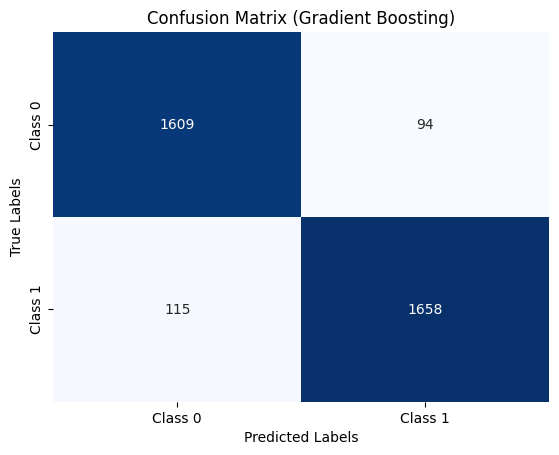

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Assuming X and y are already defined

# Changing Hyperparameters
param_grid = {
    'GradientBoosting__learning_rate': [0.01, 0.1, 0.3, 0.5],
    'GradientBoosting__max_depth': [2, 3, 5],
    'GradientBoosting__n_estimators': [25, 50, 75]
}

# # Removing OneHotEncoder from the transformer
# ct_without_ohe = ColumnTransformer(
#     transformers=[
#         ('numerical', StandardScaler(), num_col)
#     ]
# )

pipe_gradient_boosting = Pipeline([
    ('transformer', ct),
    ('GradientBoosting', GradientBoostingClassifier())
])

grid_search_gradient_boosting = GridSearchCV(pipe_gradient_boosting, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_gradient_boosting.fit(x_train, y_train)

# Evaluate the best Gradient Boosting model on the test set
best_model_gradient_boosting = grid_search_gradient_boosting.best_estimator_
y_pred_gradient_boosting = best_model_gradient_boosting.predict(x_test)

# Accuracy on the test set
test_accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print(f"Test set accuracy (Gradient Boosting): {test_accuracy_gradient_boosting:.4f}")

# Precision and Recall
precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting)
recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting)
print(f"Precision (Gradient Boosting): {precision_gradient_boosting:.4f}")
print(f"Recall (Gradient Boosting): {recall_gradient_boosting:.4f}")

# Cross-validation
cv_accuracy_gradient_boosting = cross_val_score(best_model_gradient_boosting, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy (Gradient Boosting): {cv_accuracy_gradient_boosting.mean():.4f} (±{cv_accuracy_gradient_boosting.std():.4f})")

# Print best hyperparameters
best_params_gradient_boosting = grid_search_gradient_boosting.best_params_
print(f"Best hyperparameters (Gradient Boosting): {best_params_gradient_boosting}")

# Plot confusion matrix
cm_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
sns.heatmap(cm_gradient_boosting, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()


**Using XGBoost**

Test set accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Cross-Validation Accuracy: 0.9999 (±0.0001)
Best hyperparameters: {'XGBoost__learning_rate': 0.3, 'XGBoost__max_depth': 3, 'XGBoost__n_estimators': 75}


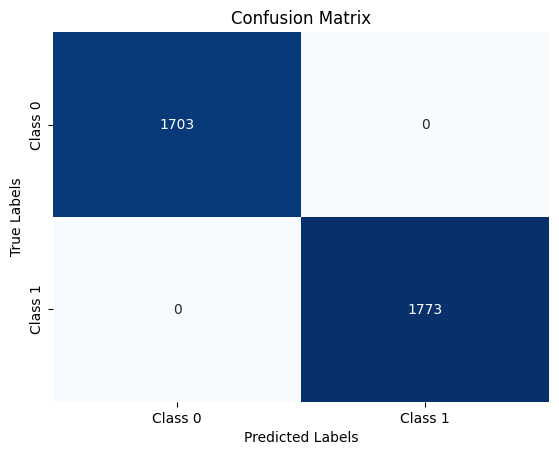

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Changing Hyperparameters
param_grid = {
    'XGBoost__learning_rate': [0.01,0.1, 0.3, 0.5],
    'XGBoost__max_depth': [2, 3, 5],
    'XGBoost__n_estimators': [25, 50, 75]
}

pipe = Pipeline([
    ('transformer', ct),
    ('XGBoost', XGBClassifier())
])

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Cross-validation
cv_accuracy = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")

# Print best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


To add regularization to our XGBoost model and overcome overfitting, we can use the reg_alpha and reg_lambda parameters. These parameters control L1 (LASSO) and L2 (Ridge) regularization, respectively. We can experiment with different values for these parameters to find the best regularization strength for your data.

Test set accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Cross-Validation Accuracy: 1.0000 (±0.0000)
Best hyperparameters: {'XGBoost__learning_rate': 0.3, 'XGBoost__max_depth': 3, 'XGBoost__n_estimators': 75, 'XGBoost__reg_alpha': 0, 'XGBoost__reg_lambda': 0}


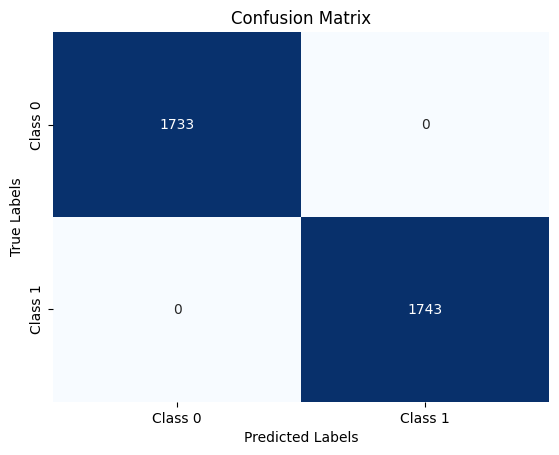

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Changing Hyperparameters
param_grid = {
    'XGBoost__learning_rate': [0.01, 0.1, 0.3, 0.5],
    'XGBoost__max_depth': [2, 3, 5],
    'XGBoost__n_estimators': [25, 50, 75],
    'XGBoost__reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'XGBoost__reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

# Create the pipeline
pipe = Pipeline([
    ('transformer', ct),
    ('XGBoost', XGBClassifier())
])

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Cross-validation
cv_accuracy = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")

# Print best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)


fin_pipe = Pipeline([('transformer', ct),
    ('XGBoost', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50,reg_alpha=0,reg_lambda=0))])

In [67]:
fin_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['venue', 'batting_team',
                                                   'bowling_team']),
                                                 ('numerical', StandardScaler(),
                                                  ['ball', 'cum_runs',
                                                   'wickets_remaining',
                                                   'run_rate',
                                                   'required_run_rate',
                                                   'ball_left', 'runs_needed',
                                                   'target'])])),
                ('XGBoost',
                 XGBClassifier(base_score=None, booster=N...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [68]:
prediction = fin_pipe.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9703682393555811

Prediction example using testing data

In [69]:
X_test.head()

,venue,batting_team,bowling_team,ball,cum_runs,wickets_remaining,run_rate,required_run_rate,ball_left,runs_needed,target
13111,"Arun Jaitley Stadium, Delhi",Netherlands,Australia,14.6,69,5.0,4.60,9.457143,210,331.0,400.0
16132,"Maharashtra Cricket Association Stadium, Pune",Afghanistan,Sri Lanka,4.6,20,9.0,4.00,4.933333,270,222.0,242.0
2306,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,31.2,125,6.0,3.99,0.000000,112,0.0,0.0
14990,"Eden Gardens, Kolkata",Netherlands,Bangladesh,44.5,185,0.0,4.13,0.000000,31,0.0,0.0
11535,"MA Chidambaram Stadium, Chepauk, Chennai",Afghanistan,Pakistan,47.6,279,8.0,5.81,2.000000,12,4.0,283.0


In [70]:
# Predict the first 5 rows of X_test
predictions_first_5 = fin_pipe.predict(X_test.head())

# Display the predictions
print("Predictions for the first 5 rows:")
print(predictions_first_5)

Predictions for the first 5 rows:
[0 1 0 1 1]


In [71]:
# Display the actual value
print("Actual value for the first 5 rows:")
print(y_test.head())

Actual value for the first 5 rows:
13111    0
16132    1
2306     0
14990    1
11535    1
Name: result, dtype: int64


#==> RESULT

#SEMIFINAL PREDICTION (Task 2)

In [72]:
Semi_finalist = pd.DataFrame({
    'venue': ["Wankhede Stadium, Mumbai", "Wankhede Stadium, Mumbai", "Eden Gardens, Kolkata", "Eden Gardens, Kolkata"],
    'batting_team': ["India", "New Zealand", "South Africa", "Australia"],
    'bowling_team': ["New Zealand", 'India', 'Australia', 'South Africa'],
    'ball': [0.1, 0.1, 0.1, 0.1],
    'cum_runs': [0, 0, 0, 0],
    'wickets_remaining': [10, 10, 10, 10],
    'run_rate': [6, 6, 6, 6],
    'required_run_rate': [0, 0, 0, 0],
    'ball_left': [299, 299, 299, 299],
    'runs_needed': [0, 0, 0, 0],
    'target': [0, 0, 0, 0]
})


In [73]:
Semi_finalist

,venue,batting_team,bowling_team,ball,cum_runs,wickets_remaining,run_rate,required_run_rate,ball_left,runs_needed,target
0,"Wankhede Stadium, Mumbai",India,New Zealand,0.1,0,10,6,0,299,0,0
1,"Wankhede Stadium, Mumbai",New Zealand,India,0.1,0,10,6,0,299,0,0
2,"Eden Gardens, Kolkata",South Africa,Australia,0.1,0,10,6,0,299,0,0
3,"Eden Gardens, Kolkata",Australia,South Africa,0.1,0,10,6,0,299,0,0


In [74]:
finalist = fin_pipe.predict(Semi_finalist)
finalist

array([1, 0, 1, 1])

1 meaning batting team is winner

In [75]:
predicted_probabilities = fin_pipe.predict_proba(Semi_finalist)

#probabilities for winning (class 1)
probabilities_class_1 = predicted_probabilities[:, 1]

# Probability of winning of the batting team
print("Predicted winning Probabilities for Batting team:")
print(probabilities_class_1[:5])


Predicted winning Probabilities for Batting team:
[0.8579289  0.13493977 0.92135984 0.7132877 ]


**According to our model India will win against New Zealand**

**South Africa will win against Australia with a probability of 92.13% if they choose batting**

**Australia will win against South Africa with a probability of 71.32 if they choose batting**

**Based on probability South Africa have a higher chances of winning as compair to Australa.**

#World Cup Winner Prediction (Task 3)

In [76]:
finalist = pd.DataFrame({'venue': ["Narendra Modi Stadium, Ahmedabad","Narendra Modi Stadium, Ahmedabad","Narendra Modi Stadium, Ahmedabad","Narendra Modi Stadium, Ahmedabad"],
            'batting_team': ["South Africa", "Australia","India","India"],
            'bowling_team': ['India','India','Australia','South Africa'],
            'ball': [0.1,0.1,0.1,0.1],
            'cum_runs':[0,0,0,0],
            'wickets_remaining': [10, 10, 10, 10],
            'run_rate':[6,6,6,6],
            'required_run_rate':[0,0,0,0],
            'ball_left':[299,299,299,299],
            'runs_needed':[0,0,0,0],
            'target':[0,0,0,0]
           })
finalist

,venue,batting_team,bowling_team,ball,cum_runs,wickets_remaining,run_rate,required_run_rate,ball_left,runs_needed,target
0,"Narendra Modi Stadium, Ahmedabad",South Africa,India,0.1,0,10,6,0,299,0,0
1,"Narendra Modi Stadium, Ahmedabad",Australia,India,0.1,0,10,6,0,299,0,0
2,"Narendra Modi Stadium, Ahmedabad",India,Australia,0.1,0,10,6,0,299,0,0
3,"Narendra Modi Stadium, Ahmedabad",India,South Africa,0.1,0,10,6,0,299,0,0


In [77]:
world_cup_winner = fin_pipe.predict(finalist)
world_cup_winner

array([0, 0, 1, 1])

In [78]:
predicted_probabilities = fin_pipe.predict_proba(finalist)

#probabilities for winning (class 1)
probabilities_class_1 = predicted_probabilities[:, 1]

# Probability of winning of the batting team
print("Predicted winning Probabilities for Batting team:")
print(probabilities_class_1[:5])

Predicted winning Probabilities for Batting team:
[0.16079827 0.08982159 0.8717374  0.83217627]


#**India will win the World Cup 2023**